<a href="https://colab.research.google.com/github/ponwinsiya2348539/expense_tracket_ADT/blob/main/2348539_aml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
data=pd.read_csv('/content/Program_2_Dataset - Program_2_Dataset.csv')

In [3]:
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [4]:
data.tail()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
501,12.80230,0.0,18.1,0,0.740,5.854,96.6,1.8956,24,666,20.2,240.52,23.79,10.8
502,10.67180,0.0,18.1,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98,11.8
503,6.28807,0.0,18.1,0,0.740,6.341,96.4,2.0720,24,666,20.2,318.01,17.79,14.9
504,9.92485,0.0,18.1,0,0.740,6.251,96.6,2.1980,24,666,20.2,388.52,16.44,12.6
505,9.32909,0.0,18.1,0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13,14.1


In [5]:
data.shape

(506, 14)

In [6]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

In [8]:
print(data.columns)

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')


Consider the attributes Av_room, distance, Property_TaxRate Non_Retail_Acres as predictors and MValue as the target variable

In [11]:
# Select the predictors and target variable
X = data[['Avg_rooms', 'Distance', 'Property_TaxRate', 'Non_Retail_Acres']]
y = data['MValue']

In [12]:
# Calculate VIF for each predictor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_factors = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [13]:
# Print VIF factors for each predictor
for i, vif in enumerate(vif_factors):
    print(f"VIF for {X.columns[i]}: {vif}")

VIF for Avg_rooms: 16.74796468070197
VIF for Distance: 6.880606903412825
VIF for Property_TaxRate: 13.861510476253434
VIF for Non_Retail_Acres: 9.598374007368621


Inference

A VIF greater than 10 is often considered indicative of high multicollinearity, suggesting strong interdependence among predictor variables. This will impact model stability.

Avg_rooms' has a particularly high VIF value of 16.75, indicating strong multicollinearity with other predictors. Property_TaxRate' also exhibits a high VIF of 13.86, suggesting potential multicollinearity.

These two can be removed

For every predictor identified, visualizing its association with the target column using scatter plot.

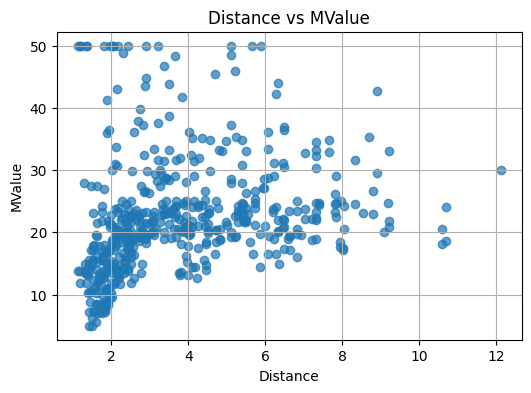

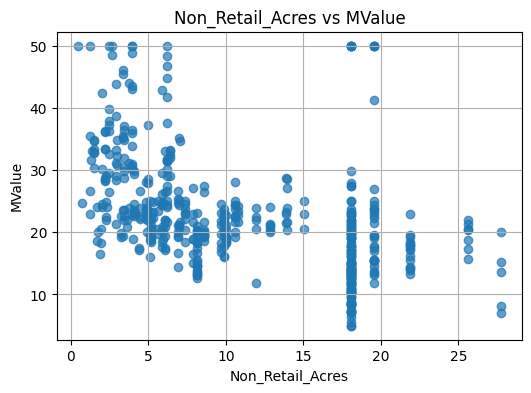

In [14]:
predictors = [ 'Distance','Non_Retail_Acres']
target = 'MValue'

# Plotting scatter plots for each predictor against the target variable
for predictor in predictors:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[predictor], data[target], alpha=0.7)
    plt.title(f'{predictor} vs {target}')
    plt.xlabel(predictor)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()

Inference

The First scatter plot shows a positive correlation between distance and MValue. This means that as the distance increases, the MValue also tends to increase. The correlation coefficient is 0.9, which is considered to be a strong correlation.

This suggests that distance is a good predictor of MValue.

The Second scatter plot shows a weak positive correlation between non-retail acres and MValue. This means that as the non-retail acres increase, the MValue also tends to increase, but the relationship is not very strong. The correlation coefficient is 0.3, which is considered to be a weak correlation.

Split the data into train and test datasets, in the ratio of 67:33



In [15]:
X = data[predictors]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (339, 2)
X_test shape: (167, 2)
y_train shape: (339,)
y_test shape: (167,)


Build a multiple linear regression model to predict the target variable using the selected predictors

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-1.27856928 -0.9452116 ]
Intercept: 38.091225709521446


Inference

These coefficients represent the estimated effect of each predictor variable on the target variable 'MValue' while holding other variables constant.

For example, a unit increase in 'Distance' is associated with a decrease of approximately 1.28 units in the 'MValue', and a unit increase in 'Non_Retail_Acres' is associated with a decrease of approximately 0.95 units in the 'MValue'.

Evaluating the model using mean squared error values, R-squared Values and adjusted R-squared values on the train and test dataset

In [17]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train_sm).fit()

In [18]:
y_train_pred = model.predict(X_train_sm)

In [19]:
train_mse = mean_squared_error(y_train,y_train_pred)
train_r_squared = model.rsquared
train_adj_r_squared = model.rsquared_adj

In [20]:
print("Training Set:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R-squared: {train_r_squared}")
print(f"Adjusted R-squared: {train_adj_r_squared}")

Training Set:
Mean Squared Error (MSE): 67.67782670758363
R-squared: 0.2581499484166434
Adjusted R-squared: 0.25373417430007583


In [21]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = model.predict(X_test_sm)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r_squared = model.rsquared
test_adj_r_squared = model.rsquared_adj

print("\nTesting Set:")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R-squared: {test_r_squared}")
print(f"Adjusted R-squared: {test_adj_r_squared}")


Testing Set:
Mean Squared Error (MSE): 55.77063948894484
R-squared: 0.2581499484166434
Adjusted R-squared: 0.25373417430007583


Inference

MSE is relatively high, indicating that the model's predictions have some variability or are not very close to the actual values.

R-squared value is approximately 0.2581, suggesting that around 25.81% of the variance in 'MValue' is explained by the selected predictors.

The adjusted R-squared value is about 0.2537, indicating a slightly adjusted measure of the model's goodness of fit, considering the number of predictors.

Conclusion

The model explains approximately 25.81% of the variance in the 'MValue' using the selected predictors. While not high, it indicates some level of association between the predictors and the target variable.

The model can make predictions on the 'MValue' using the given predictors, suggesting some level of predictive capability.